# Mean Shift

## Reading dataset

In [1]:
from assignment_3.clustering.io import read_small_dataset
from assignment_3.clustering.model import MeanShiftClustering, MeanShiftEvaluation, split_dataset
from assignment_3.clustering.utils import plot_mean_digit

In [2]:
data = read_small_dataset().reduce_to_percentage(percentage=.1)
data

2023-02-19 15:44:27.366 | INFO     | assignment_3.clustering.io:read_small_dataset:50 - Reading datasets


[Features: 784; Length: 1050]

In [3]:
X, y = data

In [4]:
data_s_30 = data.make_pca(n_components=30).rescale()
X_s_30, y_s_30 = data_s_30

In [5]:
X_s_30

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.418052,0.495106,0.414416,0.890926,0.273097,0.390481,0.427393,0.646975,0.447654,0.516866,...,0.523200,0.464895,0.639038,0.445910,0.584337,0.379540,0.283452,0.434388,0.633668,0.537984
1,0.253256,0.949054,0.376320,0.515604,0.325628,0.444193,0.371453,0.475733,0.695951,0.714616,...,0.194332,0.377773,0.392275,0.399258,0.720157,0.468933,0.253945,0.341894,0.430534,0.348917
2,0.337061,0.319225,0.512050,0.212433,0.532553,0.781849,0.655354,0.451974,0.471344,0.170427,...,0.390922,0.365946,0.428864,0.283852,0.783749,0.578358,0.355751,0.243686,0.133737,0.446685
3,0.182296,0.320934,0.399924,0.378580,0.567889,0.779601,0.371584,0.697965,0.451109,0.659737,...,0.331246,0.281636,0.504782,0.643401,0.406220,0.430576,0.458388,0.750465,0.676007,0.479579
4,0.154284,0.315946,0.630769,0.686273,0.602993,0.387836,0.547295,0.467897,0.629011,0.364052,...,0.563055,0.534133,0.177557,0.859739,0.216628,0.601588,0.505018,0.544467,0.338845,0.414011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0.362118,0.846860,0.519584,0.219324,0.480631,0.430311,0.250136,0.442595,0.619244,0.631093,...,0.403529,0.430475,0.559806,0.354514,0.550946,0.492237,0.262579,0.505943,0.650782,0.571949
1046,0.309744,0.597021,0.529768,0.520454,0.708531,0.618853,0.470509,0.252412,0.453306,0.715263,...,0.372344,0.435768,0.475501,0.086454,0.599432,0.989960,0.416686,0.402288,0.215326,0.384460
1047,0.215377,0.256185,0.383783,0.727448,0.298080,0.377864,0.379553,0.478440,0.352698,0.658335,...,0.169765,0.480913,0.599713,0.610425,0.431308,0.405482,0.412816,0.221665,0.539995,0.921024
1048,0.329973,0.298464,0.458672,0.452721,0.112446,0.674503,0.347235,0.560665,0.226662,0.704418,...,0.475849,0.323873,0.350968,0.547375,0.818500,0.468529,0.456161,0.376590,0.207692,0.419042


## Construct iteration

In [6]:
mean_shift_evaluation = MeanShiftEvaluation(
    data=data,
    n_components=[2, 5, 10],
    kernels=[0.05, 0.1, 0.3]
)

In [7]:
mean_shift_evaluation.evaluate()

2023-02-19 15:44:28.282 | INFO     | assignment_3.clustering.model:evaluate:271 - Processing kernel size: 0.05
2023-02-19 15:44:28.316 | INFO     | assignment_3.clustering.model:evaluate:275 -   > Processing number of component: 2
2023-02-19 15:44:30.185 | INFO     | assignment_3.clustering.model:evaluate:275 -   > Processing number of component: 5
2023-02-19 15:44:30.965 | INFO     | assignment_3.clustering.model:evaluate:275 -   > Processing number of component: 10
2023-02-19 15:44:31.893 | INFO     | assignment_3.clustering.model:evaluate:271 - Processing kernel size: 0.1
2023-02-19 15:44:31.923 | INFO     | assignment_3.clustering.model:evaluate:275 -   > Processing number of component: 2
2023-02-19 15:44:37.434 | INFO     | assignment_3.clustering.model:evaluate:275 -   > Processing number of component: 5
2023-02-19 15:44:38.601 | INFO     | assignment_3.clustering.model:evaluate:275 -   > Processing number of component: 10
2023-02-19 15:44:39.693 | INFO     | assignment_3.cluster

In [8]:
mean_shift_evaluation.results

{0.05: {2: {'score': 0.8947151482137182, 'n_clusters': 86},
  5: {'score': 0.9005020654591674, 'n_clusters': 986},
  10: {'score': 0.9002115393345136, 'n_clusters': 1049}},
 0.1: {2: {'score': 0.8546225430114849, 'n_clusters': 14},
  5: {'score': 0.9020200644604839, 'n_clusters': 651},
  10: {'score': 0.900324118207817, 'n_clusters': 1015}},
 0.3: {2: {'score': 0.0997902764537655, 'n_clusters': 1},
  5: {'score': 0.44890825729719913, 'n_clusters': 3},
  10: {'score': 0.9058186935403332, 'n_clusters': 283}}}

In [9]:
mean_shift_evaluation.best_model

[N-rows: 1050; N-components: 10, Score: 0.9058186935403332, N-clusters: 283]

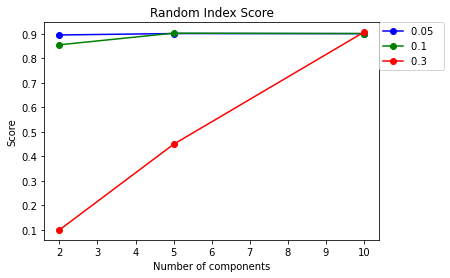

In [11]:
mean_shift_evaluation.plot_score()

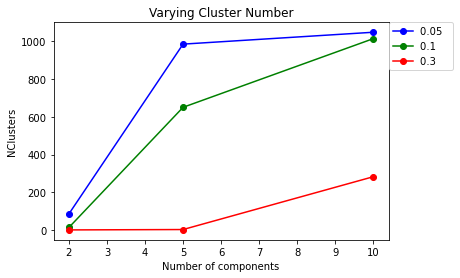

In [12]:
mean_shift_evaluation.plot_n_clusters()

## Best model

In [13]:
best = mean_shift_evaluation.best_model

In [14]:
split = split_dataset(data=data, index=best.out)
len(split)

283

In [15]:
split = {k: v for k, v in split.items() if len(v) >= 5}
len(split)

58

C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


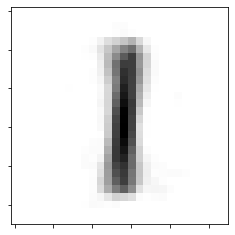

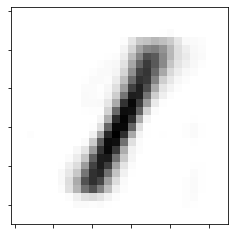

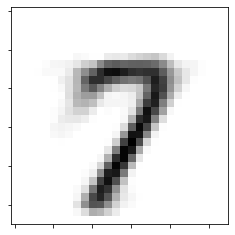

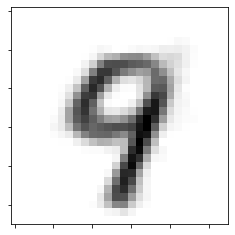

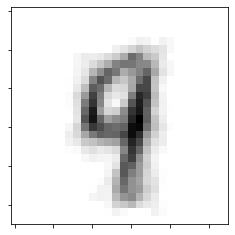

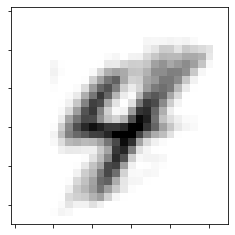

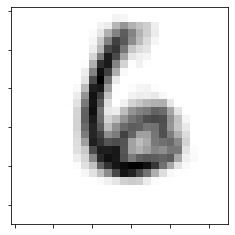

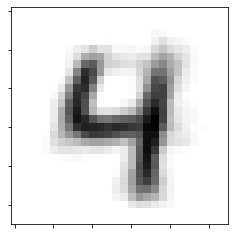

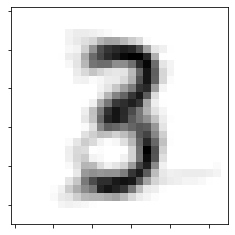

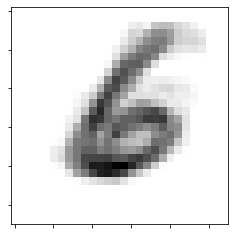

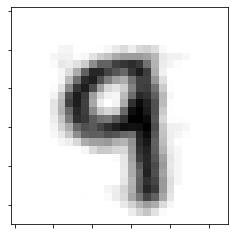

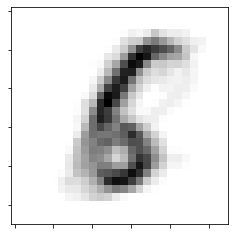

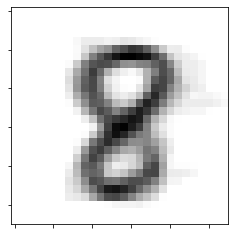

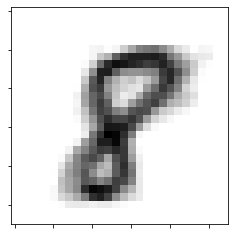

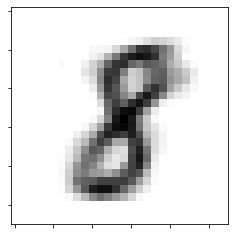

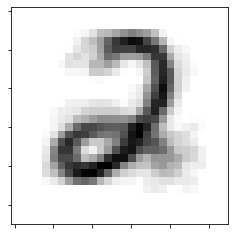

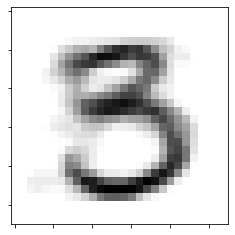

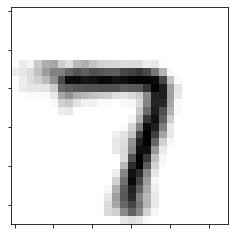

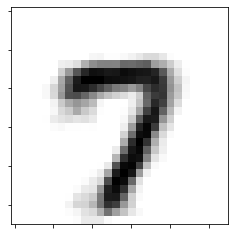

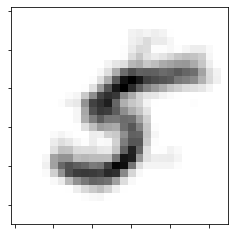

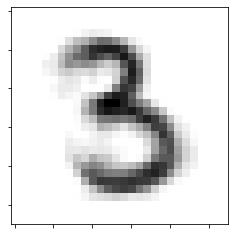

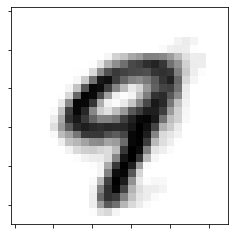

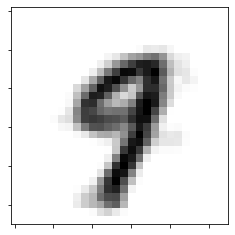

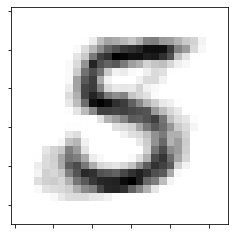

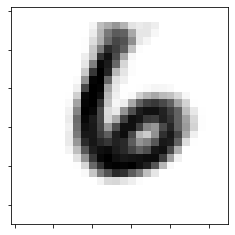

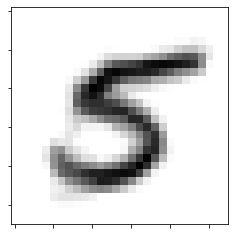

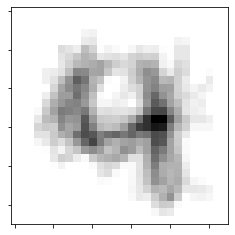

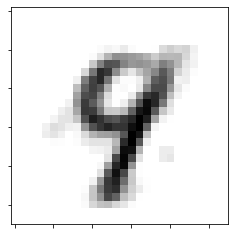

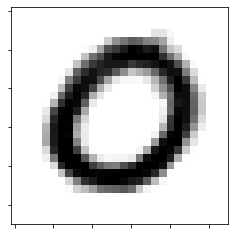

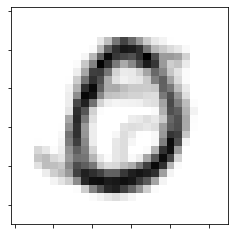

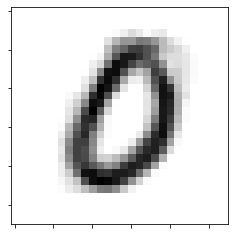

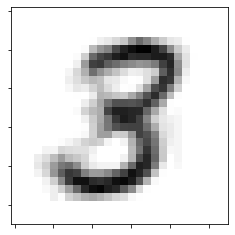

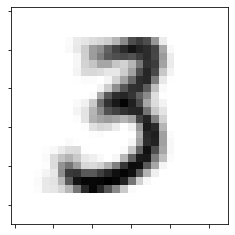

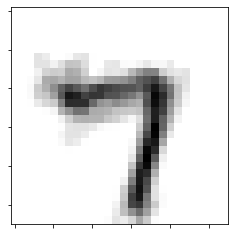

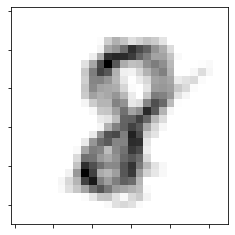

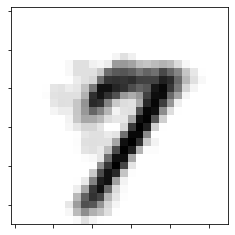

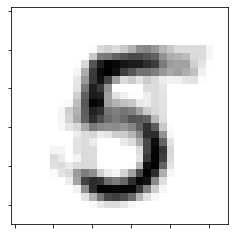

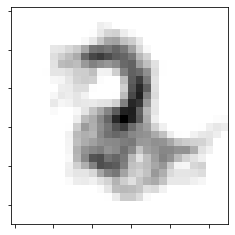

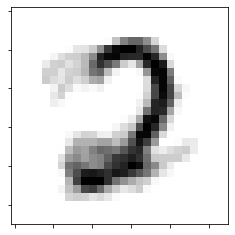

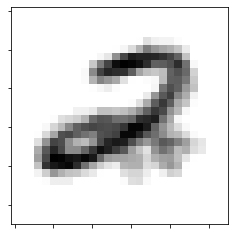

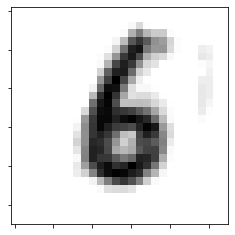

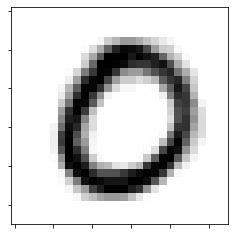

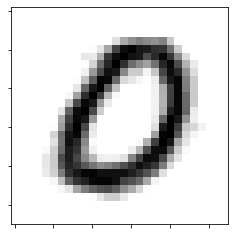

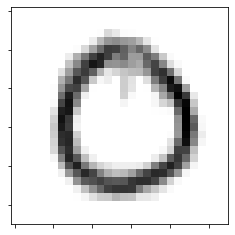

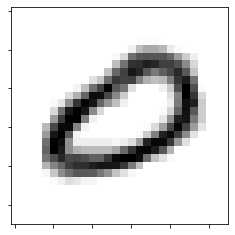

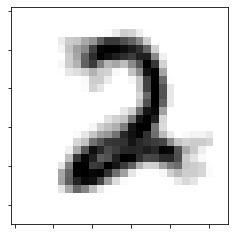

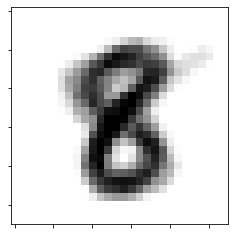

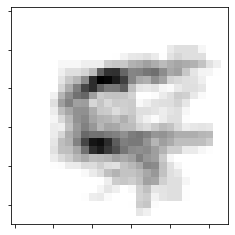

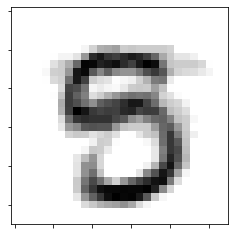

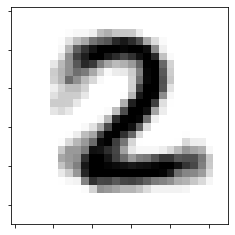

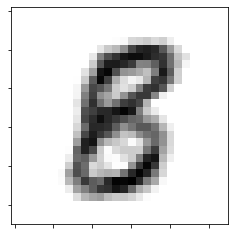

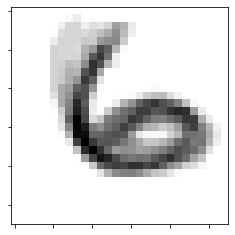

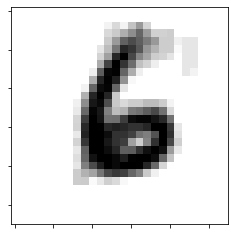

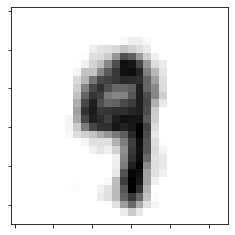

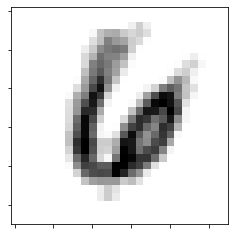

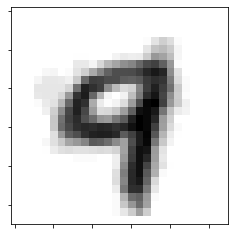

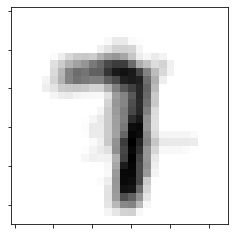

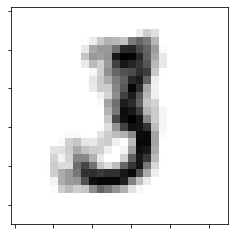

In [16]:
for s in split.values():
    plot_mean_digit(X=s.X)